# Octree-Search 

본 노트북에서는 배경제거를 위한 기반 지식 이해를 목적으로 octree를 이용한 근접 포인트 탐색 및 selection에 대하여 다루고 있습니다. 

In [4]:
import pcl
import numpy as np
import random

In [5]:
# -*- coding: utf-8 -*-
from __future__ import print_function

import sys
sys.path.append("/workspace/include")
from visualization_helper import *
import k3d

%matplotlib inline

# 테스트 포인트 생성

In [6]:
cloud = pcl.PointCloud()

points = np.zeros((1000, 3), dtype=np.float32)
RAND_MAX = 1024
for i in range(0, 1000):
    points[i][0] = 1024 * random.random () / (RAND_MAX)
    points[i][1] = 1024 * random.random () / (RAND_MAX)
    points[i][2] = 1024 * random.random () / (RAND_MAX)

cloud.from_array(points)
print(type(cloud))
print(cloud)

<type 'pcl._pcl.PointCloud'>
<PointCloud of 1000 points>


(x) : 1.0m
(y) : 1.0m
(z) : 1.0m


0

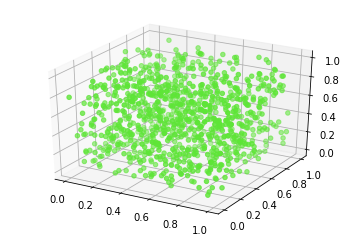

In [8]:
visualization3D_xyz(points)
cloud.to_file('extract_whole.pcd')

In [9]:
# 센터 포인트 생성 
searchPoint = pcl.PointCloud()
searchPoints = np.zeros((1, 3), dtype=np.float32)
searchPoints[0][0] = 0.5
searchPoints[0][1] = 0.5
searchPoints[0][2] = 0.5

searchPoint.from_array(searchPoints)

In [10]:
# 센터 포인트 생성 
searchPoint = pcl.PointCloud()
searchPoints = np.zeros((2, 3), dtype=np.float32)
searchPoints[0][0] = 0.5
searchPoints[0][1] = 0.5
searchPoints[0][2] = 0.5
searchPoints[1][0] = 0.3
searchPoints[1][1] = 0.3
searchPoints[1][2] = 0.3

searchPoint.from_array(searchPoints)

(x) : 0.2m
(y) : 0.2m
(z) : 0.2m


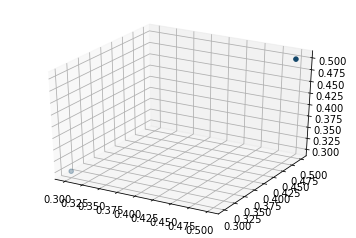

In [11]:
visualization3D_xyz(searchPoints)

In [12]:
searchPoint

<PointCloud of 2 points>

# Octree 생성

In [14]:
resolution = 0.2
octree = cloud.make_octreeSearch(resolution)
octree.add_points_from_input_cloud()

In [17]:
K = 10
# // Neighbors within radius search
[ind, sqdist] = octree.nearest_k_search_for_cloud(searchPoint, K)
# if nearest_k_search_for_cloud
for i in range(0, 10):#ind.size):
    print ('(' + str(cloud[ind[0][i]][0]) + ' ' + str(cloud[ind[0][i]][1]) + ' ' + str(cloud[ind[0][i]][2]) + ' (squared distance: ' + str(sqdist[0][i]) + ')')


(0.514276444912 0.449676275253 0.47906935215 (squared distance: 0.0031743862)
(0.464296519756 0.500559806824 0.453801989555 (squared distance: 0.003409308)
(0.467270761728 0.4907143116 0.550601482391 (squared distance: 0.003717937)
(0.470619678497 0.51630294323 0.438015073538 (squared distance: 0.00497112)
(0.557017862797 0.512456655502 0.539844155312 (squared distance: 0.0049937614)
(0.556672334671 0.435941189528 0.533919155598 (squared distance: 0.008465794)
(0.508935153484 0.438727349043 0.430625736713 (squared distance: 0.008646963)
(0.505649030209 0.561916649342 0.425761669874 (squared distance: 0.009376912)
(0.419159114361 0.443974256516 0.465385615826 (squared distance: 0.010872289)
(0.552587985992 0.420702338219 0.453601747751 (squared distance: 0.011206414)


In [18]:
ind = ind[0]

In [19]:
lind = ind.tolist()

In [20]:
cloudC = cloud.extract(lind)

(x) : 0.1m
(y) : 0.1m
(z) : 0.1m


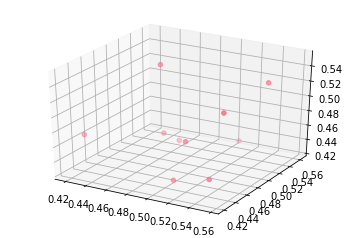

In [22]:
pa = cloudC.to_array()
visualization3D_xyz(pa)